About this dataset
Age : Age of the patient
Sex : Sex of the patient
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp : Chest Pain type chest pain type
 {Value 1: typical angina
 Value 2: atypical angina
 Value 3: non-anginal pain
 Value 4: asymptomatic}
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results
  {Value 0: normal
  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05   mV)
  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria}
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack

With given Dataset building a ML-Model to predict whether a person is at risk of having heart attack.

# Importing Libraires

In [77]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from numpy.random import seed
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [78]:
heart = pd.read_csv("heart.csv")
satura = pd.read_csv("o2Saturation.csv")

Exploring the data

In [79]:
heart.shape

(303, 14)

In [80]:
satura.shape

(3585, 1)

In [81]:
satura.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [82]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking for Null values in the Data

In [84]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No null values found

In [85]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Visualization

Observing the distribution of target Varibles using plots

1    165
0    138
Name: output, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

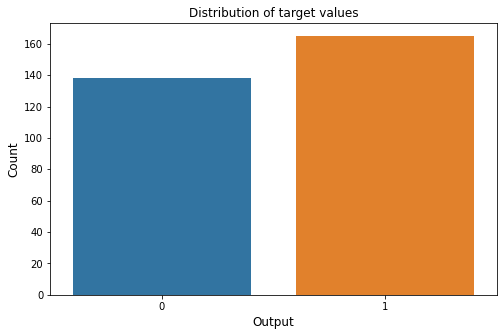

In [86]:
print(heart['output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = heart['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

Plotting histograms to visualize the distribution of data

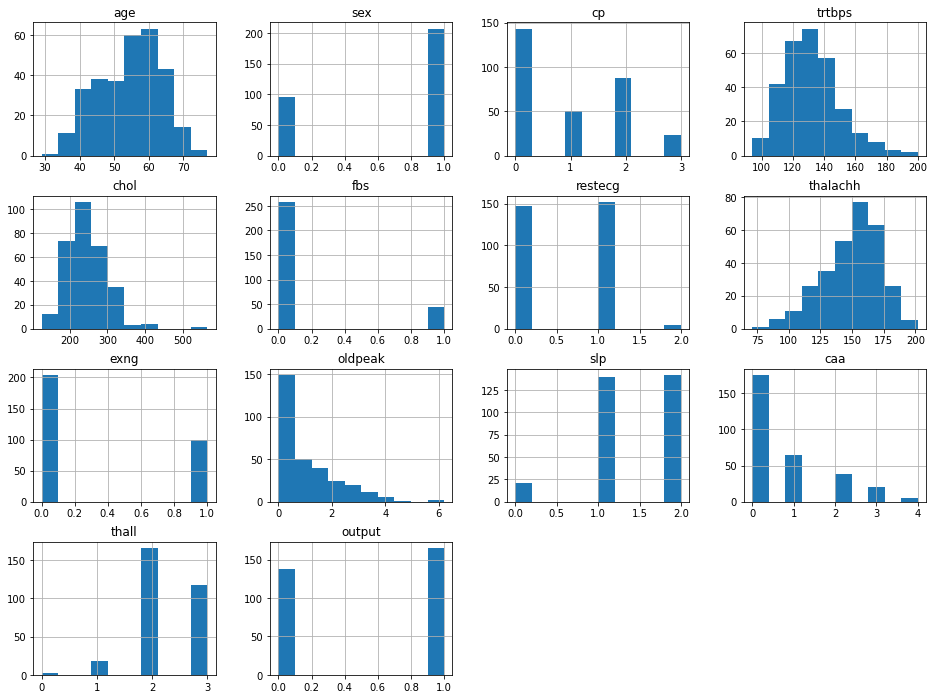

In [87]:
heart.hist(bins=10, figsize=(16,12))
plt.show()

Using box plots to analyse Outliers.

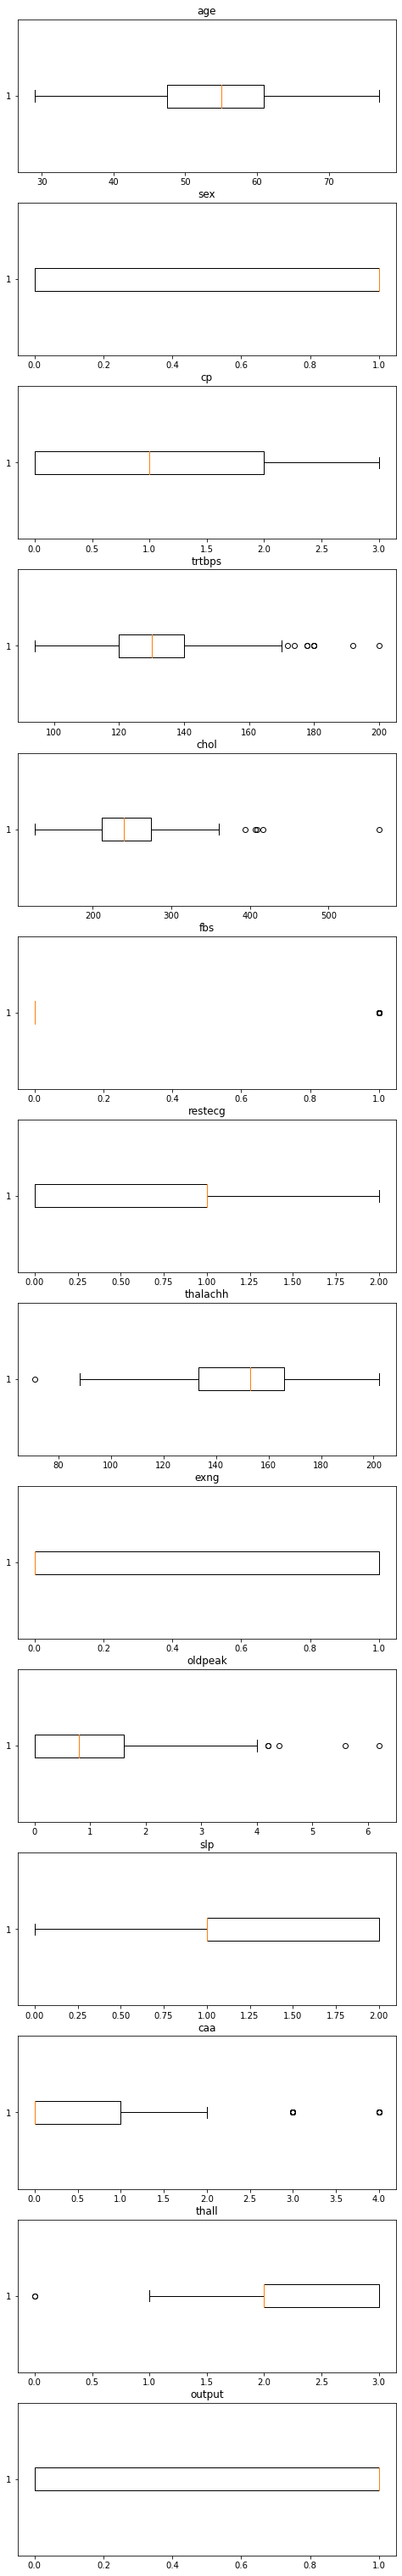

In [88]:
col = heart.columns
fgi, ax = plt.subplots(len(heart.columns),1 , figsize = (8,55))
for ind, axi in enumerate(ax.flat):
    axi.boxplot(heart[col[ind]], vert = False)
    axi.set_title(col[ind], size = 12)

Heat maps to analyse the correaltion between different features

<AxesSubplot:>

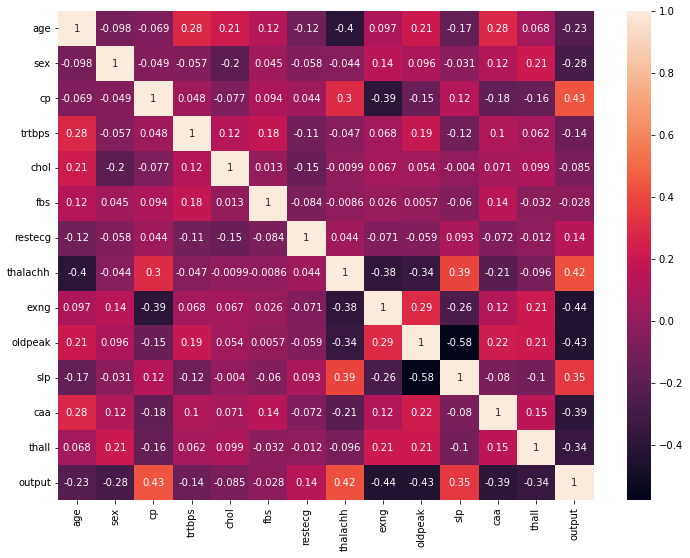

In [89]:
cor = heart.corr()
plt.figure(figsize =  (12,9))
sns.heatmap(cor, annot = True)

Getting the correlation of Target Variable(output) with all other variables.

In [90]:
rel= cor['output'].sort_values(ascending = False)
rel

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [91]:
l = []
for i in range (len(rel)):
    if rel[i] > 0:
        l.append(rel.index[i])
l

['output', 'cp', 'thalachh', 'slp', 'restecg']

# Building Model

Separating the dataset into independent and target variable.

In [92]:
x = heart.iloc[:,:-1]
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [93]:
y = heart.loc[:,'output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

Normalizing the data using StandardScaler()

In [94]:
col = x.columns
std = StandardScaler()
x = std.fit_transform(x)
x = pd.DataFrame(data = x, columns = col)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


Spilting the data into Train and Test Samples

In [95]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)

Using different models and checking their performance scores.

# Random Forest Classifier

In [96]:
best = 0
esti = 0
best_predict = 0
l = []
for i in range (20, 110):
    rcla = RandomForestClassifier(n_estimators = i)
    rcla.fit(xtrain, ytrain)
    predict = rcla.predict(xtest)
    acu = accuracy_score(predict, ytest)
    l.append(acu)
    if best < acu:
        best = acu
        best_predict = predict

Using plot to analyze variation of accuracy with number of estimators

Accuracy using Random Forest is: 88.52459016393442 %


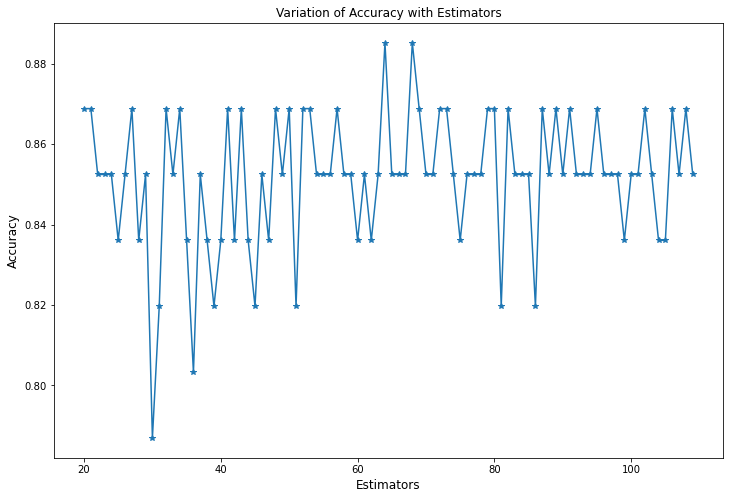

In [97]:
plt.figure(figsize = (12,8))
plt.plot(range (20 ,110), l, marker = "*")
plt.xlabel("Estimators", size = 12)
plt.ylabel("Accuracy", size = 12)
plt.title("Variation of Accuracy with Estimators", size = 12)
print("Accuracy using Random Forest is: {} %".format(best*100))

Ploting the ROC curve

AUC value is 0.8858225108225108


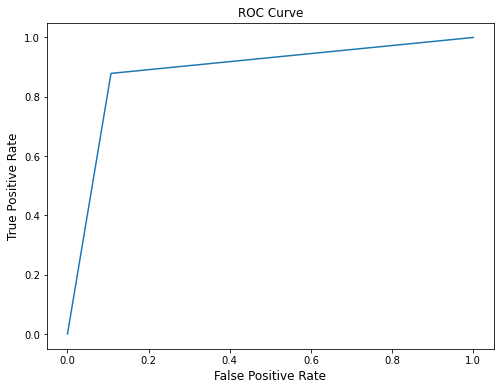

In [98]:
fpr, tpr, threshould = roc_curve(best_predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

<AxesSubplot:>

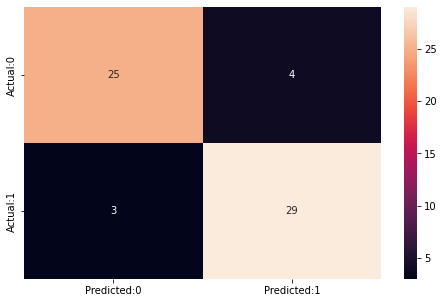

In [99]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,best_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

# Decision Tree

Using GridSearchCV to get best paramters for Decision Tree Model

In [100]:
parameters={
           'max_features':['log2','sqrt'],
           'criterion':['gini','entropy'],
           'max_depth':[8,9,10,11,12,13,14,15,16,17,18,19,20],
           'min_samples_split':[2,3,4,5,6,7,8,9,10],
           'min_samples_split':[2,3,4,5,6,7,8,9,10],
          }
dcla=DecisionTreeClassifier(random_state=9)
model1=GridSearchCV(dcla,parameters,scoring='accuracy')
model1.fit(xtrain,ytrain)
print(model1.best_params_)
predict = model1.predict(xtest)
print("Accuracy using Decision Tree is: {} %".format(accuracy_score(predict, ytest)*100))

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_split': 6}
Accuracy using Decision Tree is: 83.60655737704919 %


AUC value is 0.8575450450450451


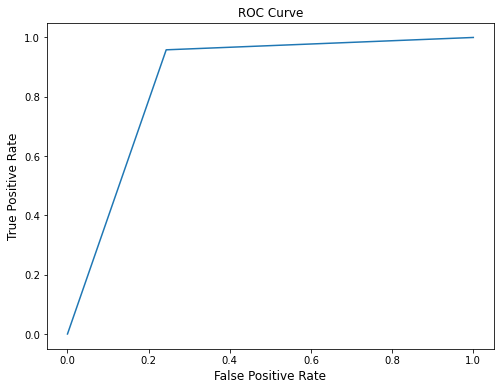

In [101]:
fpr, tpr, threshould = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

<AxesSubplot:>

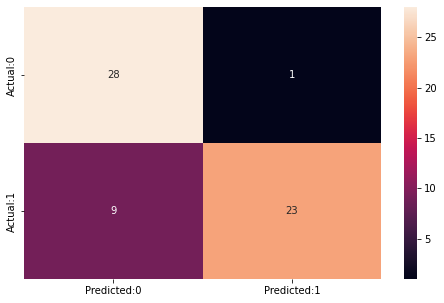

In [102]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

# Logistic Regression

In [103]:
lcla = LogisticRegression()
lcla.fit(xtrain, ytrain)
predict = lcla.predict(xtest)
print("Accuracy using Logistic Regression is: {} %".format(accuracy_score(predict, ytest)*100))

Accuracy using Logistic Regression is: 85.24590163934425 %


AUC value is 0.8521505376344087


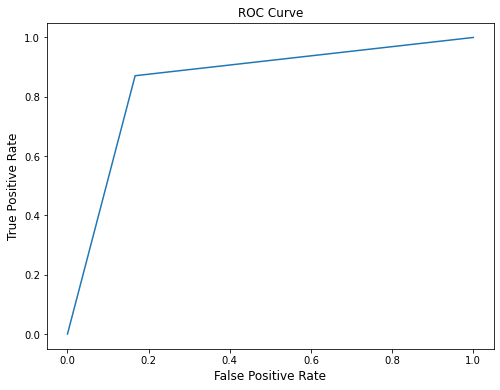

In [104]:
fpr, tpr, threshould = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

<AxesSubplot:>

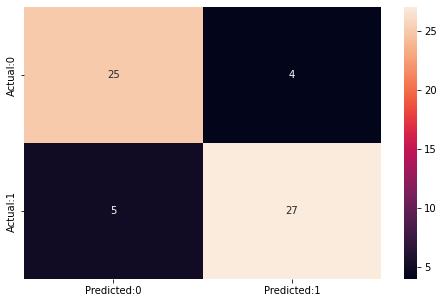

In [105]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

# Support Vector Machine

In [106]:
scla = SVC()
scla.fit(xtrain, ytrain)
predict = scla.predict(xtest)
print("Accuracy using Support Vector Machine is: {} %".format(accuracy_score(predict, ytest)*100))

Accuracy using Support Vector Machine is: 86.88524590163934 %


AUC value is 0.8693548387096774


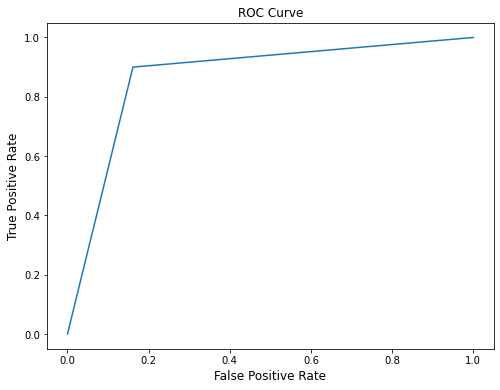

In [107]:
fpr, tpr, threshould = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

<AxesSubplot:>

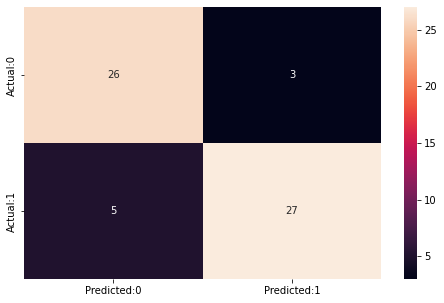

In [108]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

# K Nearest Neighbors

In [109]:
l = []
maxi = 0
ind = 0
best = 0
best_predict = 0
for i in range (4, 40):
    kcla = KNeighborsClassifier(n_neighbors = i)
    kcla.fit(xtrain, ytrain)
    predict = kcla.predict(xtest)
    acu = accuracy_score(predict, ytest)
    l.append(acu)
    if maxi < acu :
        maxi = acu
        ind = i
        best = acu
        best_predict = predict

Accuracy using K Nearest Neighbors is: 93.44262295081968 %


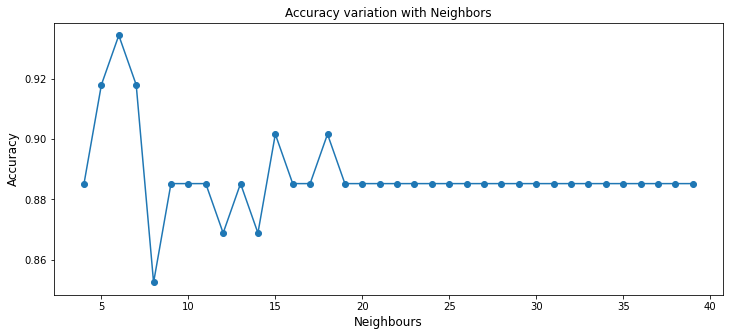

In [110]:
plt.figure(figsize = (12,5))
plt.plot(range (4, 40), l, marker = 'o')
plt.xlabel('Neighbours', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with Neighbors', size = 12)
print("Accuracy using K Nearest Neighbors is: {} %".format(best*100))

AUC value is 0.9349462365591398


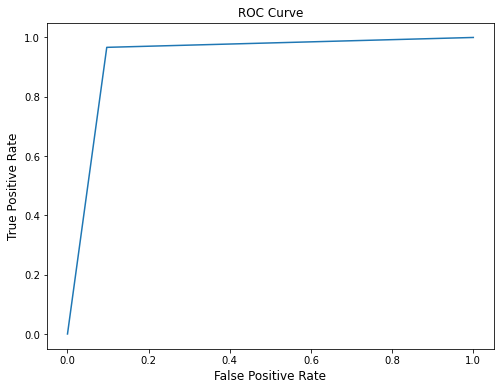

In [111]:
fpr, tpr, threshould = roc_curve(best_predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

<AxesSubplot:>

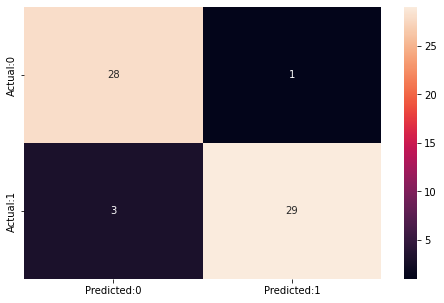

In [112]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,best_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

# BernoulliNB

In [113]:
bcla = BernoulliNB()
bcla.fit(xtrain, ytrain)
predict = bcla.predict_proba(xtest)
predict = np.argmax(predict, axis = 1)
print("Accuracy using BernoulliNB is: {} %".format(accuracy_score(predict, ytest)*100))

Accuracy using BernoulliNB is: 86.88524590163934 %


AUC value is 0.8685344827586206


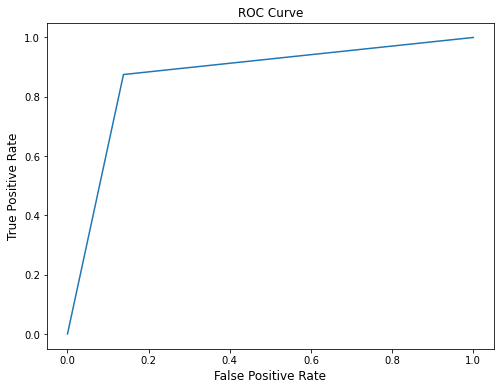

In [114]:
fpr, tpr, threshould = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

<AxesSubplot:>

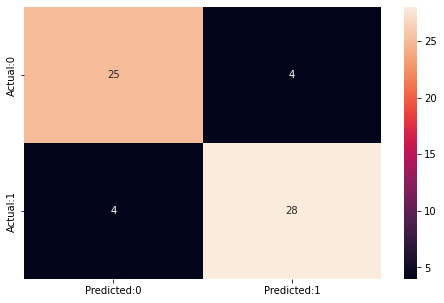

In [115]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

# GaussianNB

In [116]:
gcla = GaussianNB()
gcla.fit(xtrain, ytrain)
predict = gcla.predict_proba(xtest)
predict = np.argmax(predict, axis = 1)
print("Accuracy using GaussianNB is: {} %".format(accuracy_score(predict, ytest)*100))

Accuracy using GaussianNB is: 86.88524590163934 %


AUC value is 0.8693548387096774


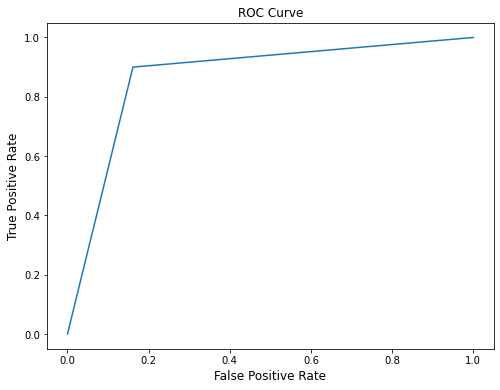

In [117]:
fpr, tpr, threshould = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

<AxesSubplot:>

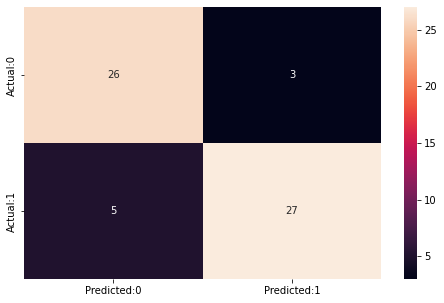

In [118]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

The best accuracy score was achieved with KNeighborsClassifier equal to 93.4426%